<a href="https://colab.research.google.com/github/haruka-inb/pytorch_practice/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression  

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

1/20 epochs, training loss is 4.703972816467285
2/20 epochs, training loss is 3.9611051082611084
3/20 epochs, training loss is 3.3410520553588867
4/20 epochs, training loss is 2.8235063552856445
5/20 epochs, training loss is 2.391522169113159
6/20 epochs, training loss is 2.0309534072875977
7/20 epochs, training loss is 1.729993462562561
8/20 epochs, training loss is 1.478786826133728
9/20 epochs, training loss is 1.269108533859253
10/20 epochs, training loss is 1.0940920114517212
11/20 epochs, training loss is 0.9480070471763611
12/20 epochs, training loss is 0.8260706067085266
13/20 epochs, training loss is 0.7242900729179382
14/20 epochs, training loss is 0.6393333077430725
15/20 epochs, training loss is 0.5684184432029724
16/20 epochs, training loss is 0.5092243552207947
17/20 epochs, training loss is 0.4598131775856018
18/20 epochs, training loss is 0.41856756806373596
19/20 epochs, training loss is 0.384137362241745
20/20 epochs, training loss is 0.35539597272872925


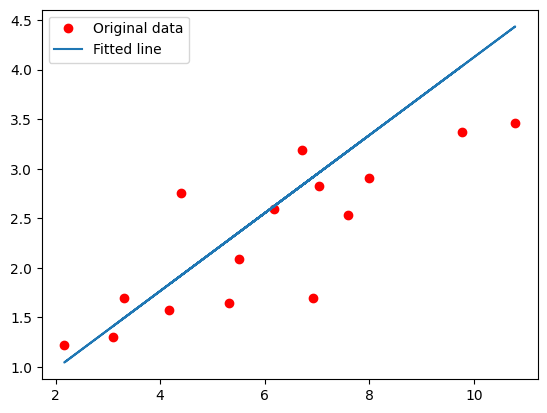

In [ ]:
# define hyper parameters
input_size = 1
output_size = 1
epochs = 20
learning_rate = 0.001

# toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# linear regression model
model = nn.Linear(input_size, output_size)

# loss and optimizer
criteria = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# train the model
for e in range(epochs):
  # convert numpy arrays to torch tensors
  inputs = torch.from_numpy(x_train)
  targets = torch.from_numpy(y_train)

  # forward pass
  outputs = model(inputs)
  loss = criteria(outputs, targets)

  # backward and optimize
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  print("{}/{} epochs, training loss is {}".format(e+1, epochs, loss.item()))

# plot the graph
pred = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, pred, label='Fitted line')
plt.legend()
plt.show()


# save the model checkpoint
torch.save(model.state_dict(), 'param.ckpt')